<h1>IMPORTS</h1>

In [1]:
# Standard python imports

import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

%matplotlib inline

<h1>LOADING HALO CATALOGUE</h1>
<h3>Along with some overall diagonstics/statistics about the data</h3>

In [5]:
from ObjectInfo import HaloInfo

#halos,x_min,x_max,y_min,y_max,z_min,z_max,mass_min,mass_max=LoadHaloCat('Trial_PP_halo_catalog_1024Mpc_n2048_masses.npy')

HaloInfo('Trial_PP_halo_catalog_512Mpc_n1024.npy')

Shape of array: (239629, 4)


x minimum: -174.08
x maximum: 174.07793
y minimum: -174.0781
y maximum: 174.07822
z minimum: -174.07962
z maximum: 174.07954


x box size: 348.15793
y box size: 348.1563
z box size: 348.15918


minimum mass: 6.800068e+11
maximum mass: 1.674573e+15
maximum/minimum mass: 2462.5833


In [5]:
(229706/239629)

0.9585901539463086

<h1>3D POSITION PLOT OF HALOS</h1>

<Figure size 432x288 with 0 Axes>

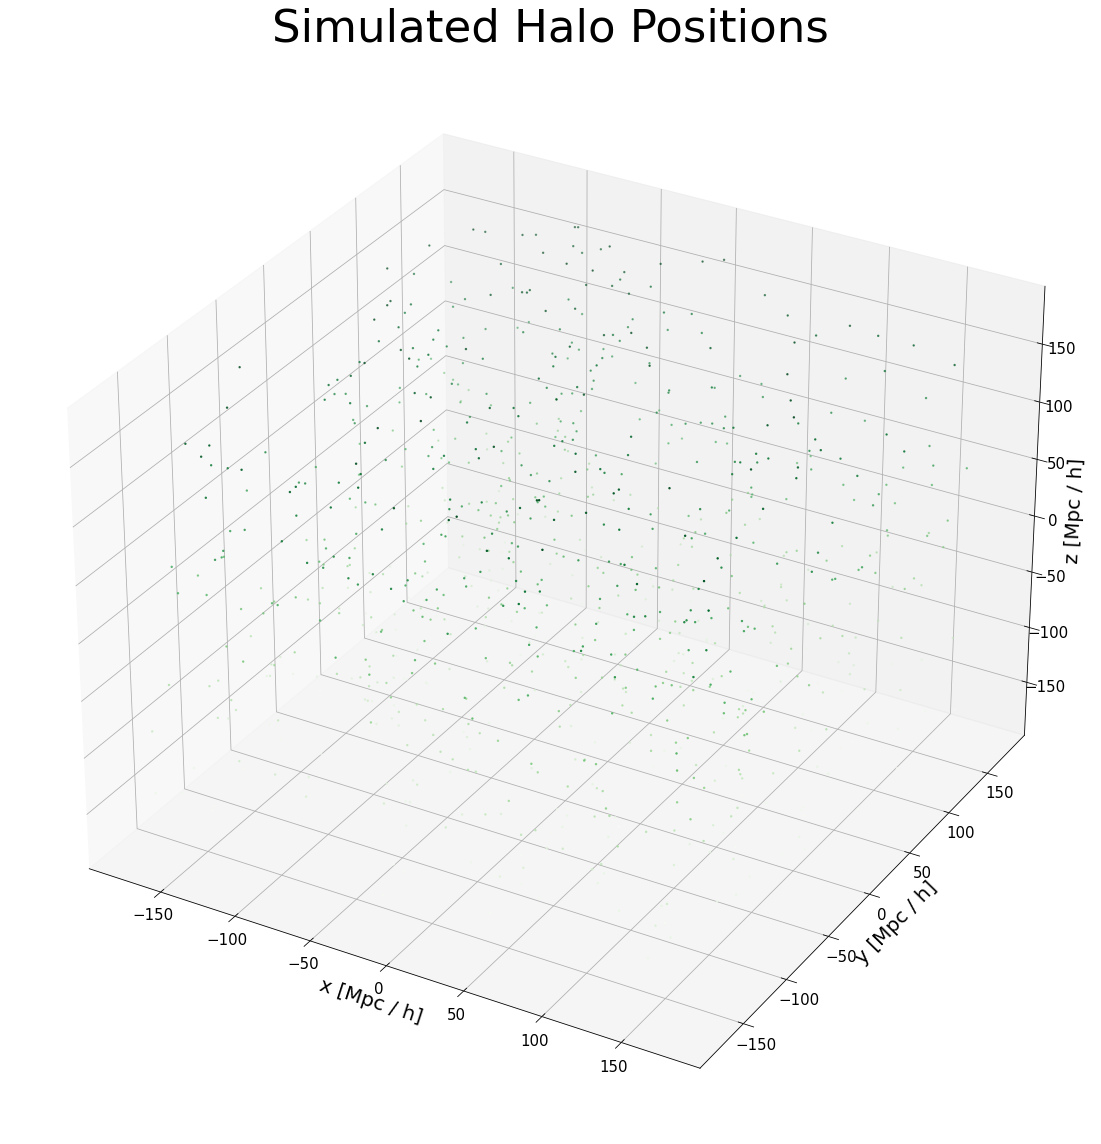

In [6]:
from PositionPlot import HaloPositionPlot

HaloPositionPlot('RandomHalos_MassBin4_512res.npy', pointSize=2, title="Simulated Halo Positions", graphSize=20, axisLabelSize=20, axisTickSize=15, titleSize=45)

<h1>HALO MASS HISTOGRAM</h1>

1000000100000.0


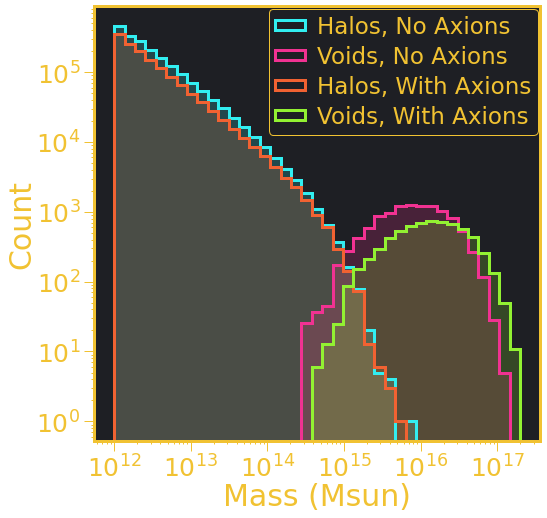

In [88]:
from LoadCat import LoadHaloCat
from LoadCat import LoadVoidCat

plt.rcParams['axes.facecolor'] = '#1E1F24'
plt.rcParams["axes.edgecolor"] = "#F1C232"
plt.rcParams["axes.linewidth"] = 3

halos,x_min,x_max,y_min,y_max,z_min,z_max,mass_min,mass_max=LoadHaloCat('Trial_PP_halo_catalog_1024Mpc_n2048.npy')
halos_2,x_min_2,x_max_2,y_min_2,y_max_2,z_min_2,z_max_2,mass_min_2,mass_max_2=LoadHaloCat('Trial_PP_halo_catalog_1024Mpc_n2048_1_25_10.npy')

voids,x_min_void,x_max_void,y_min_void,y_max_void,z_min_void,z_max_void,radius_min_void,radius_max_void,delta_avg_min_void,delta_avg_max_void,mean_density,void_density,void_mass,density_min_void,density_max_void,mass_min_void,mass_max_void=LoadVoidCat('Trial_PP_void_catalog_1024Mpc_n2048.txt')
voids_2,x_min_void_2,x_max_void_2,y_min_void_2,y_max_void_2,z_min_void_2,z_max_void_2,radius_min_void_2,radius_max_void_2,delta_avg_min_void_2,delta_avg_max_void_2,mean_density_2,void_density_2,void_mass_2,density_min_void_2,density_max_void_2,mass_min_void_2,mass_max_void_2=LoadVoidCat('Trial_PP_void_catalog_1024Mpc_n2048_1_25_10.npy')


#Create mass bins, evenly spaced in logarithmic space
bins_mass_halo=np.geomspace(10**12, 1.99e+17, num=40)
#print("Mass Histogram Bins:", bins_mass_halo)

#do the histogram
plt.figure(figsize=(8,8))

halos[::1, 3]=halos[::1, 3]/0.68
halos_2[::1, 3]=halos_2[::1, 3]/0.68

print(np.amin(halos[::1, 3]))

void_mass=void_mass.to(u.Msun)
void_mass=void_mass/u.Msun
void_mass_2=void_mass_2.to(u.Msun)
void_mass_2=void_mass_2/u.Msun


plt.hist(halos[::1, 3], bins=bins_mass_halo, log=True, label="Halos, No Axions", density=False, histtype="step", lw=3, color="#32eef1")
plt.hist(halos[::1, 3], bins=bins_mass_halo, log=True, density=False, histtype="bar", color="#32eef1", alpha=0.2)

plt.hist(void_mass, bins=bins_mass_halo, log=True, label="Voids, No Axions", density=False, histtype="step", lw=3, color="#f13292")
plt.hist(void_mass, bins=bins_mass_halo, log=True, density=False, histtype="bar", color="#f13292", alpha=0.2)


plt.hist(halos_2[::1, 3], bins=bins_mass_halo, log=True, label="Halos, With Axions", density=False, histtype="step", lw=3, color="#f16232")
plt.hist(halos_2[::1, 3], bins=bins_mass_halo, log=True, density=False, histtype="bar", color="#f16232", alpha=0.2)

plt.hist(void_mass_2, bins=bins_mass_halo, log=True, label="Voids, With Axions", density=False, histtype="step", lw=3, color="#92f132")
plt.hist(void_mass_2, bins=bins_mass_halo, log=True, density=False, histtype="bar", color="#92f132", alpha=0.2)



#halos_hist_1, halos_bins_1 = np.histogram(halos[::1, 3], bins=bins_mass_halo)
#halos_hist_2, halos_bins_2 = np.histogram(halos_2[::1, 3], bins=bins_mass_halo)




#voids_hist_1, voids_bins_1 = np.histogram(void_mass, bins=bins_mass_halo)
#voids_hist_2, voids_bins_2 = np.histogram(void_mass_2, bins=bins_mass_halo)

#plt.plot(halos_bins_1[1:], halos_hist_1/halos_hist_2)
#plt.plot(voids_bins_1[1:], voids_hist_1/voids_hist_2)


plt.legend(loc="upper right", fontsize=23, labelcolor="#F1C232", frameon=True, framealpha=1, edgecolor="#F1C232", markerfirst=True, labelspacing=0.3, borderpad=0.3, borderaxespad=0.1, handletextpad=0.5, handleheight=0.3, handlelength=1.3)

plt.xscale('log')
#plt.yscale('log', base=100)

#plt.title("Masses of the Halos", fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.minorticks_on()
plt.tick_params('both', length=3, width=1, which='minor', color="#F1C232", labelcolor="#F1C232")
plt.tick_params('both', length=10, width=1, which='major', labelcolor="#F1C232", color="#F1C232")
plt.xlabel("Mass (Msun)", size=30, color="#F1C232", labelpad=0)
plt.ylabel("Count", fontsize=30, color="#F1C232", labelpad=0)
#plt.xscale('log')
#plt.ylim(-1.2,0.4)
#plt.xlim(5,10**2)

plt.show()

In [12]:
from LoadCat import LoadHaloCat

#Create mass bins, evenly spaced in logarithmic space
bins_mass_halo=np.geomspace(6.80000000e+11, 4.37000000e+15, num=3)
print("Mass Histogram Bins:", bins_mass_halo)

Mass Histogram Bins: [6.80000000e+11 5.45123839e+13 4.37000000e+15]


<h1>CREATE RANDOM HALO POSITIONS</h1>
<h3>And create 3D plot of them as well</h3>

In [23]:
from GenerateRandoms import GenerateRandomHalos

GenerateRandomHalos('Trial_PP_halo_catalog_1024Mpc_n2048_1_25_10.npy', seed=0, export_rand_file=True, fileAppendix="axion_random_total", include_rand_plot=False, pointSize=0.05, title="Random Halo Positions", graphSize=20, axisLabelSize=20, axisTickSize=15, titleSize=45)

Shape of random array: (1410661, 3)
Random Halo Catalogue Saved as Trial_PP_halo_catalog_1024Mpc_n2048_1_25_10_axion_random_total.npy


array([[  33.98980452,  113.58882134,  223.92894671],
       [ 149.8405955 ,  -87.19235805,  206.82440902],
       [  71.55616342,  257.90129048,  137.5121186 ],
       ...,
       [ 275.56473388, -298.64540166,  162.52462978],
       [-302.89905076, -271.93934182,  202.44551494],
       [-326.72013604,   61.68593179, -236.40199003]])

<h1>LOADING VOID CATALOGUE</h1>
<h3>Along with some overall diagonstics/statistics about the data</h3>

In [7]:
from ObjectInfo import VoidInfo
VoidInfo('Trial_PP_void_catalog_1024Mpc_n2048.txt', autoCenter=False, boxLength=512)

Shape of array: (11099, 9)


x minimum: 0.059617
x maximum: 696.2109
y minimum: 0.108543
y maximum: 696.127466
z minimum: 0.068604
z maximum: 696.251586


x box size: 696.151283
y box size: 696.018923
z box size: 696.1829819999999


minimum radius: 4.239
maximum radius: 43.528
mean radius: 17.11711433462474
maximum/minimum radius: 10.268459542344893


minimum delta_avg: -0.662329
maximum delta_avg: 2.871131
maximum/minimum delta_avg: -4.334901536849512


The mean density is: 8.685451636698969e-27 kg / m3
minimum density: 2.932825139615778e-27 kg / m3
maximum density: 3.3622521079826117e-26 kg / m3
maximum/minimum density: 11.464209245093596


minimum mass: 7.129379185849611e+44 kg
maximum mass: 2.2247736207948525e+47 kg
maximum/minimum mass: 312.0571318763045


<h1>3D POSITION PLOT OF VOIDS</h1>

<Figure size 432x288 with 0 Axes>

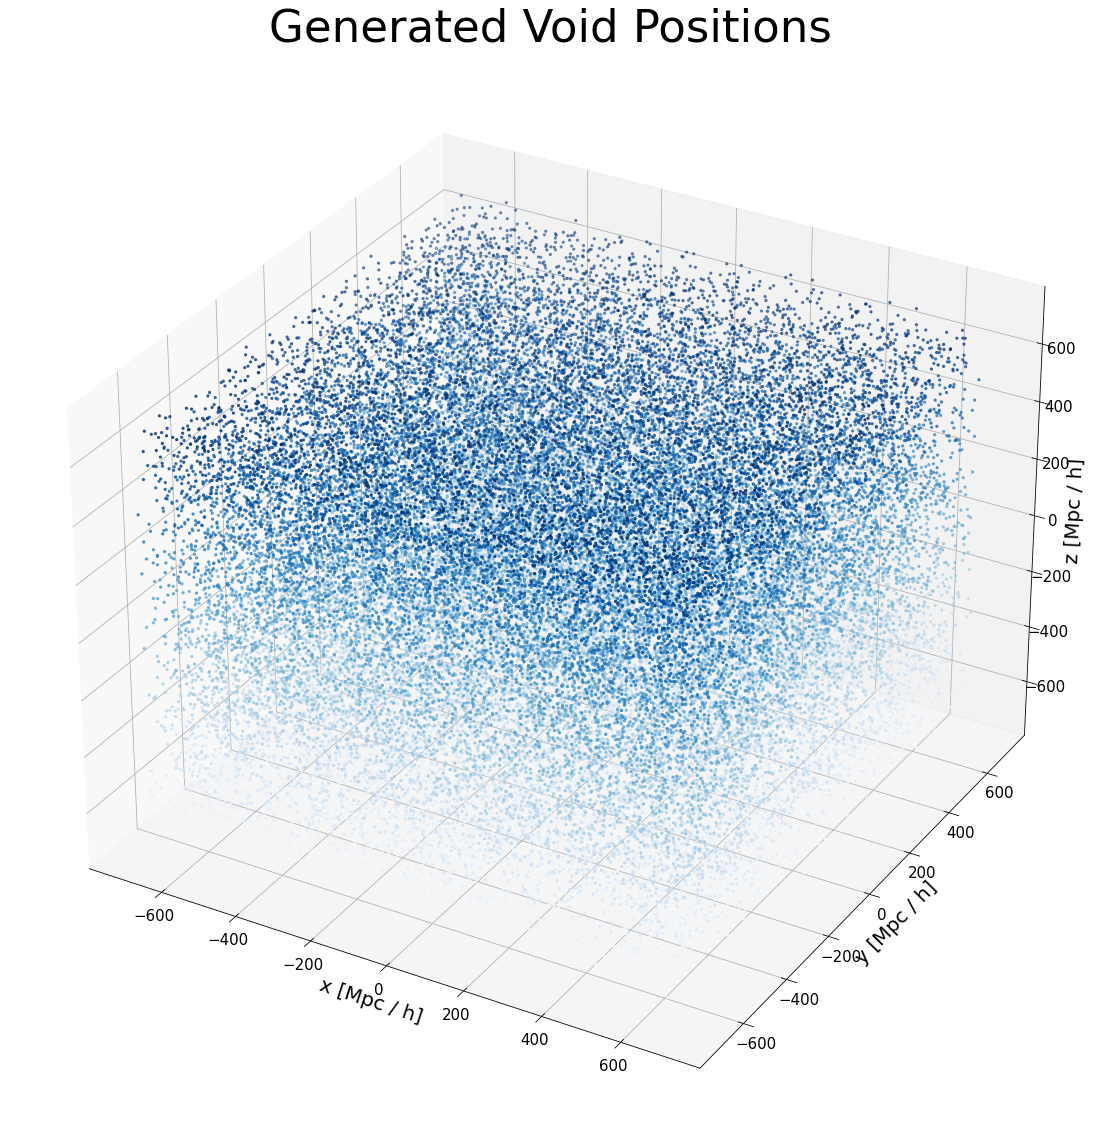

In [3]:
from PositionPlot import VoidPositionPlot

VoidPositionPlot('RandomVoids_MassBin1_2048Mpc.npy', autoCenter=False, boxLength=512, pointSize=0.5, title="Generated Void Positions", graphSize=20, axisLabelSize=20, axisTickSize=15, titleSize=45)

<h1>VOID MASS HISTOGRAM</h1>

Mass Histogram Bins: [7.63004003e-24 8.57885946e-24 9.64566757e-24 1.08451366e-23
 1.21937634e-23 1.37100962e-23 1.54149897e-23 1.73318920e-23
 1.94871672e-23 2.19104577e-23 2.46350919e-23 2.76985429e-23
 3.11429437e-23 3.50156665e-23 3.93699746e-23 4.42657545e-23
 4.97703401e-23 5.59594381e-23 6.29181700e-23 7.07422419e-23
 7.95392618e-23 8.94302188e-23 1.00551147e-22 1.13054998e-22
 1.27113742e-22 1.42920735e-22 1.60693377e-22 1.80676103e-22
 2.03143744e-22 2.28405306e-22 2.56808223e-22 2.88743132e-22
 3.24649247e-22 3.65020400e-22 4.10411833e-22 4.61447833e-22
 5.18830320e-22 5.83348499e-22 6.55889717e-22 7.37451662e-22
 8.29156092e-22 9.32264255e-22 1.04819424e-21 1.17854049e-21
 1.32509570e-21 1.48987551e-21 1.67514621e-21 1.88345590e-21
 2.11766955e-21 2.38100841e-21] kg / m3


Text(0, 0.5, 'Count')

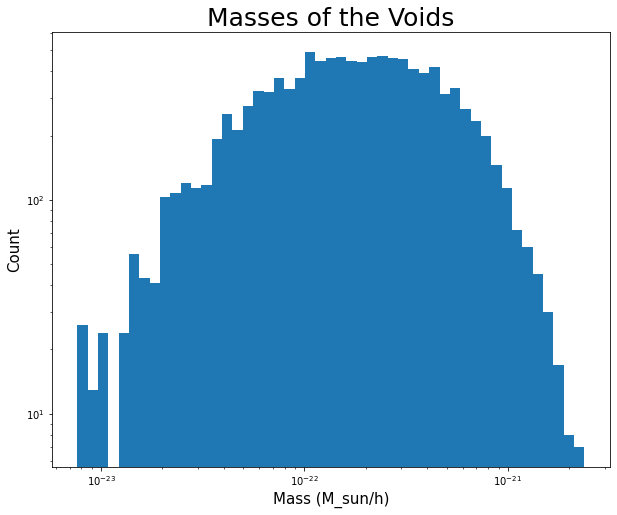

In [52]:
#Create mass bins, evenly space in logarithmic space
bins_mass_void=np.geomspace(mass_min_void, mass_max_void, num=50)
print("Mass Histogram Bins:", bins_mass_void)

#do the histogram
plt.figure(figsize=(10,8))
plt.hist(void_mass, bins=bins_mass_void, log=True)
plt.gca().set_xscale("log")
plt.title("Masses of the Voids", fontsize=25)
plt.xlabel("Mass (M_sun/h)", fontsize=15)
plt.ylabel("Count", fontsize=15)

<h1>CREATE RANDOM VOID POSITIONS</h1>
<h3>And create 3D plot of them as well</h3>

Shape of random array: (6643, 3)
Random Void Catalogue Saved as Trial_PP_void_catalog_1024Mpc_n2048_1_25_10_axion_random_total.npy


array([[  34.01025204,   -1.19012625,  285.86894278],
       [ 149.83537103,  168.26451324, -297.01964388],
       [  71.56828641, -130.16546149,  337.79433191],
       ...,
       [ 145.09977453, -323.33134832,  311.6255616 ],
       [-338.84933458,  -12.15394565,   45.56851596],
       [-115.24549662,  -81.68668381,  119.00944061]])

<Figure size 432x288 with 0 Axes>

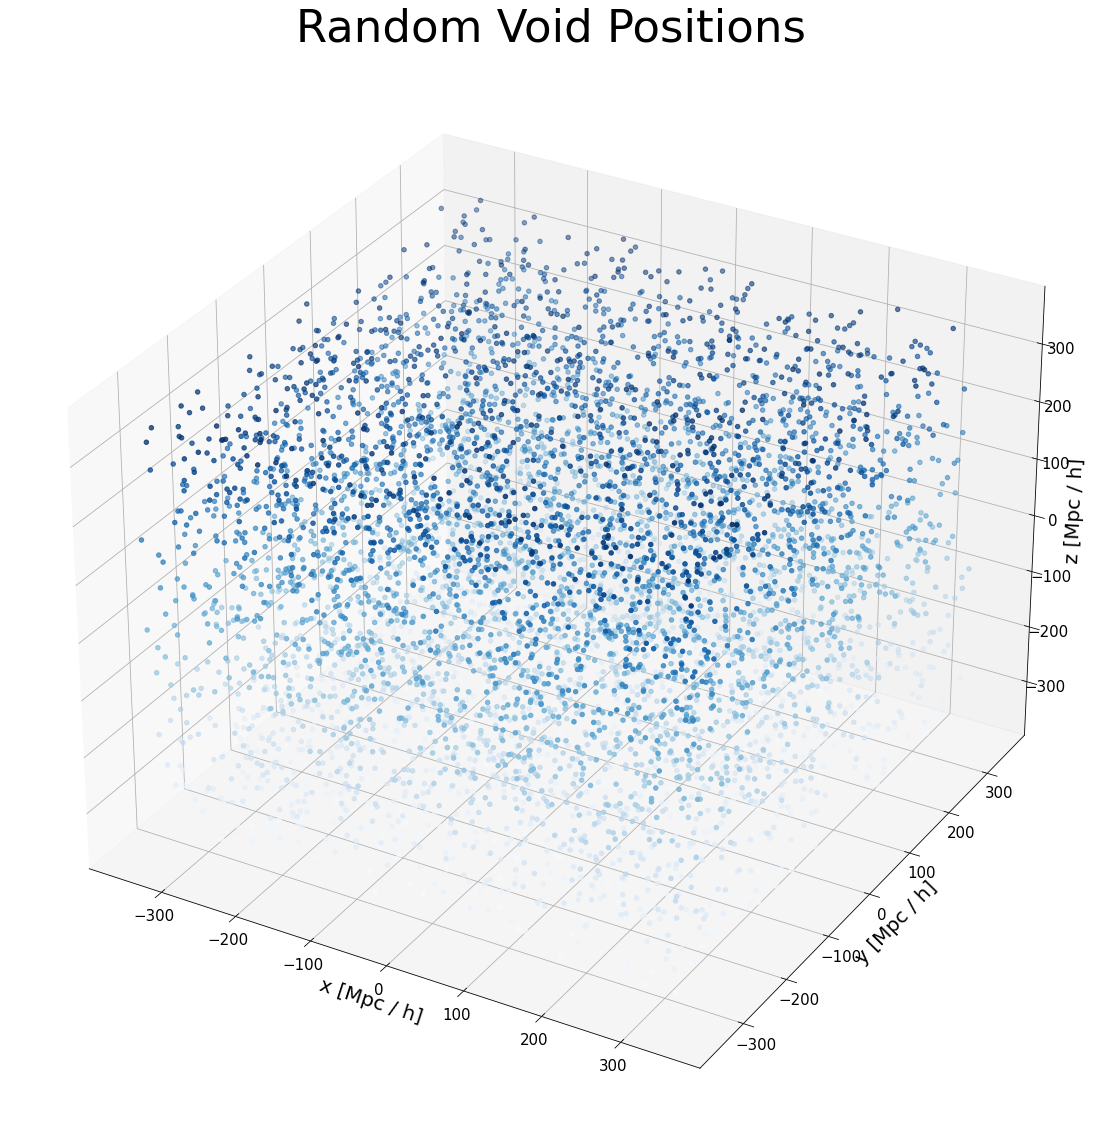

In [36]:
from GenerateRandoms import GenerateRandomVoids

GenerateRandomVoids('RandomVoids_MassBin1_512res.npy', autoCenter=False, boxLength=1024, seed=0, export_rand_file=True, fileAppendix="axion_random_total", include_rand_plot=True, pointSize=2, title="Random Void Positions", graphSize=20, axisLabelSize=20, axisTickSize=15, titleSize=45)

<h1>SELECT HALOS BY XYZ</h1>

Shape of array: (229706, 4)


x minimum: -174.0772
x maximum: 174.07793
y minimum: -174.07805
y maximum: 174.07822
z minimum: -174.07964
z maximum: 174.07954




array([[-1.1057286e+02, -5.0082184e+01, -2.2129054e+00,  9.1637174e+14],
       [-7.4274399e+01, -2.7740942e+01,  3.3695404e+01,  9.3485184e+14],
       [-1.7063252e+02, -4.1853786e+01,  2.6461729e+01,  7.5709254e+14],
       ...,
       [ 1.2551031e+02,  2.0246767e+01, -6.7686790e+01,  6.9413136e+11],
       [ 6.6116592e+01,  3.1015993e+01, -6.4202583e+01,  7.6450025e+11],
       [ 7.3934517e+01, -3.4478748e+01, -6.0290359e+01,  6.8256740e+11]],
      dtype=float32)

<Figure size 432x288 with 0 Axes>

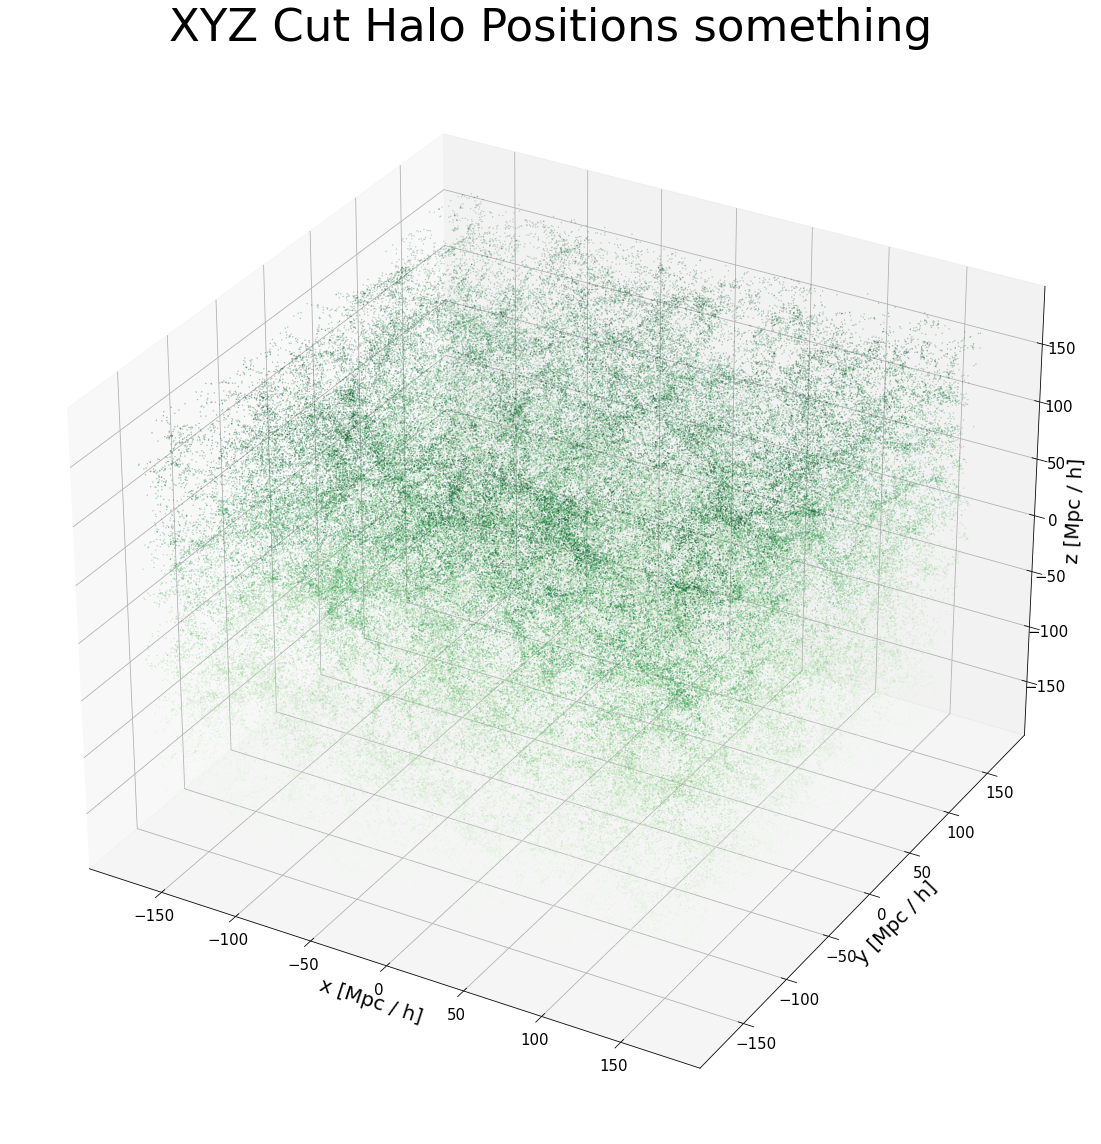

In [4]:
from SelectObjects import SelectHalosByXYZ
SelectHalosByXYZ('Trial_PP_halo_catalog_512Mpc_n1024.npy', -174.08, 174.08, -174.08, 174.08, -174.08, 174.08, export_file=False, include_plot=True, generate_randoms=False, seed=0, export_rand_file=False, fileAppendix="random", include_rand_plot=False, pointSize=0.05, title="XYZ Cut Halo Positions something", graphSize=20, axisLabelSize=20, axisTickSize=15, titleSize=45)

<h1>SELECT VOIDS BY XYZ</h1>

Shape of array: (251, 9)


x minimum: -97.59881600000003
x maximum: 98.48332799999997
y minimum: -99.48505900000004
y maximum: 99.35312899999997
z minimum: -99.77129500000004
z maximum: 98.90785899999997


XYZ Selected Void Catalogue Saved as 1024box_masszobov-Voids_cat_xmin_-100_xmax_100_ymin_-100_ymax_100_zmin_-100_zmax_100.npy
Shape of random array: (251, 3)
Random Void Catalogue Saved as RandomVoids_random.npy


array([[ 5.6520000e+03, -1.9493301e+01, -1.9991277e+01, ...,
        -1.5488700e-01, -1.3531279e+01,  3.5626960e+00],
       [ 5.8110000e+03,  7.7017255e+01, -8.2421762e+01, ...,
        -6.1527000e-02, -3.6078700e+00,  2.4982210e+00],
       [ 3.2730000e+03, -3.3699832e+01, -2.0712740e+01, ...,
        -3.3451000e-01, -2.2673588e+01,  1.5627530e+00],
       ...,
       [ 8.1880000e+03,  6.3701454e+01,  2.6665146e+01, ...,
         4.5846800e-01,  5.5842660e+00,  1.0956580e+00],
       [ 4.3070000e+03, -6.8786110e+01,  8.1461800e+01, ...,
         1.0845250e+00,  1.5110006e+01,  1.1513750e+00],
       [ 3.2830000e+03,  6.1113269e+01, -2.6769104e+01, ...,
         8.9946100e-01,  1.1592644e+01,  1.0469430e+00]])

<Figure size 432x288 with 0 Axes>

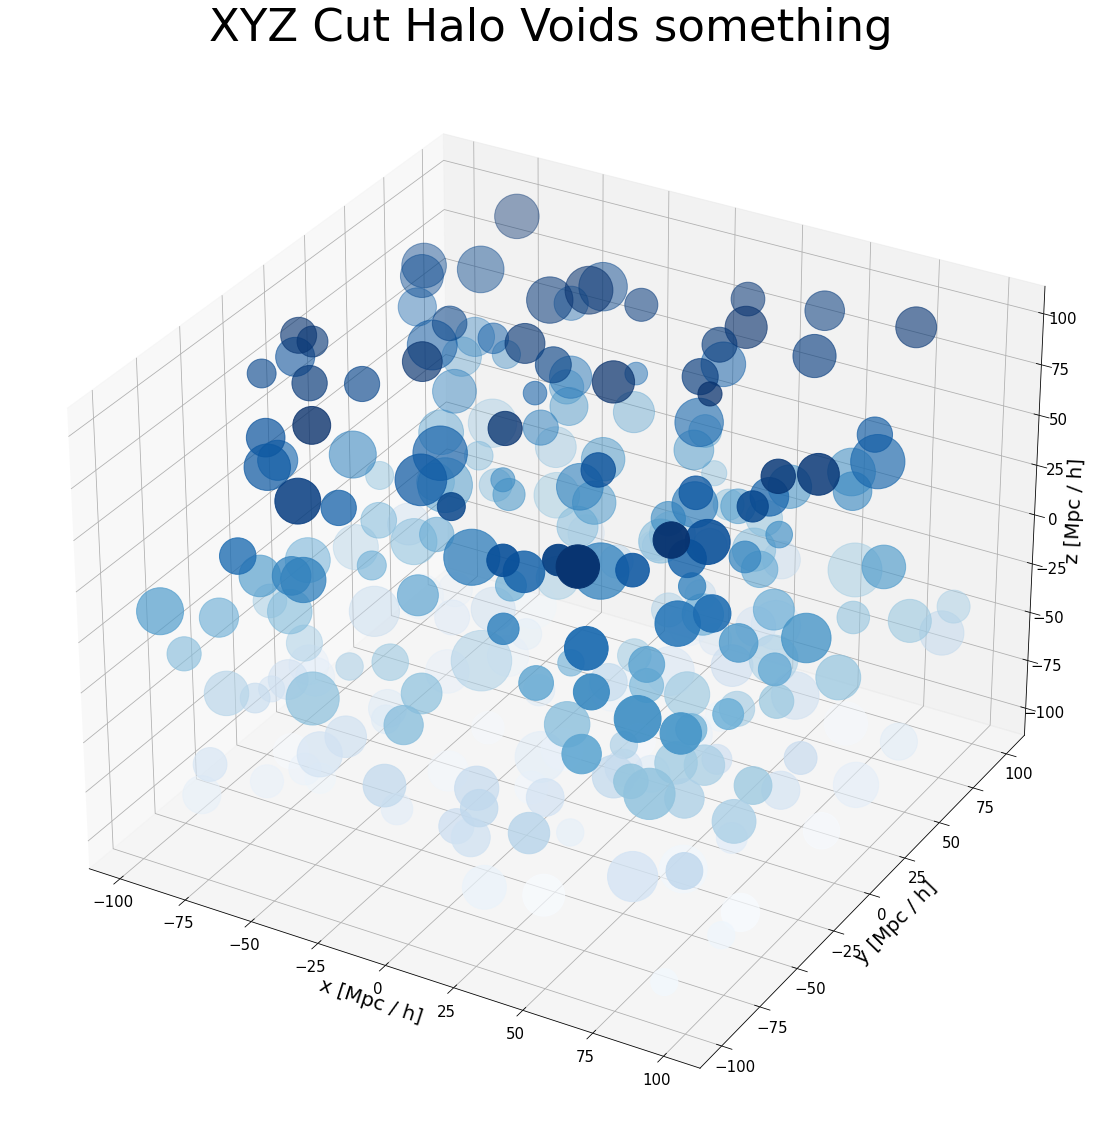

<Figure size 432x288 with 0 Axes>

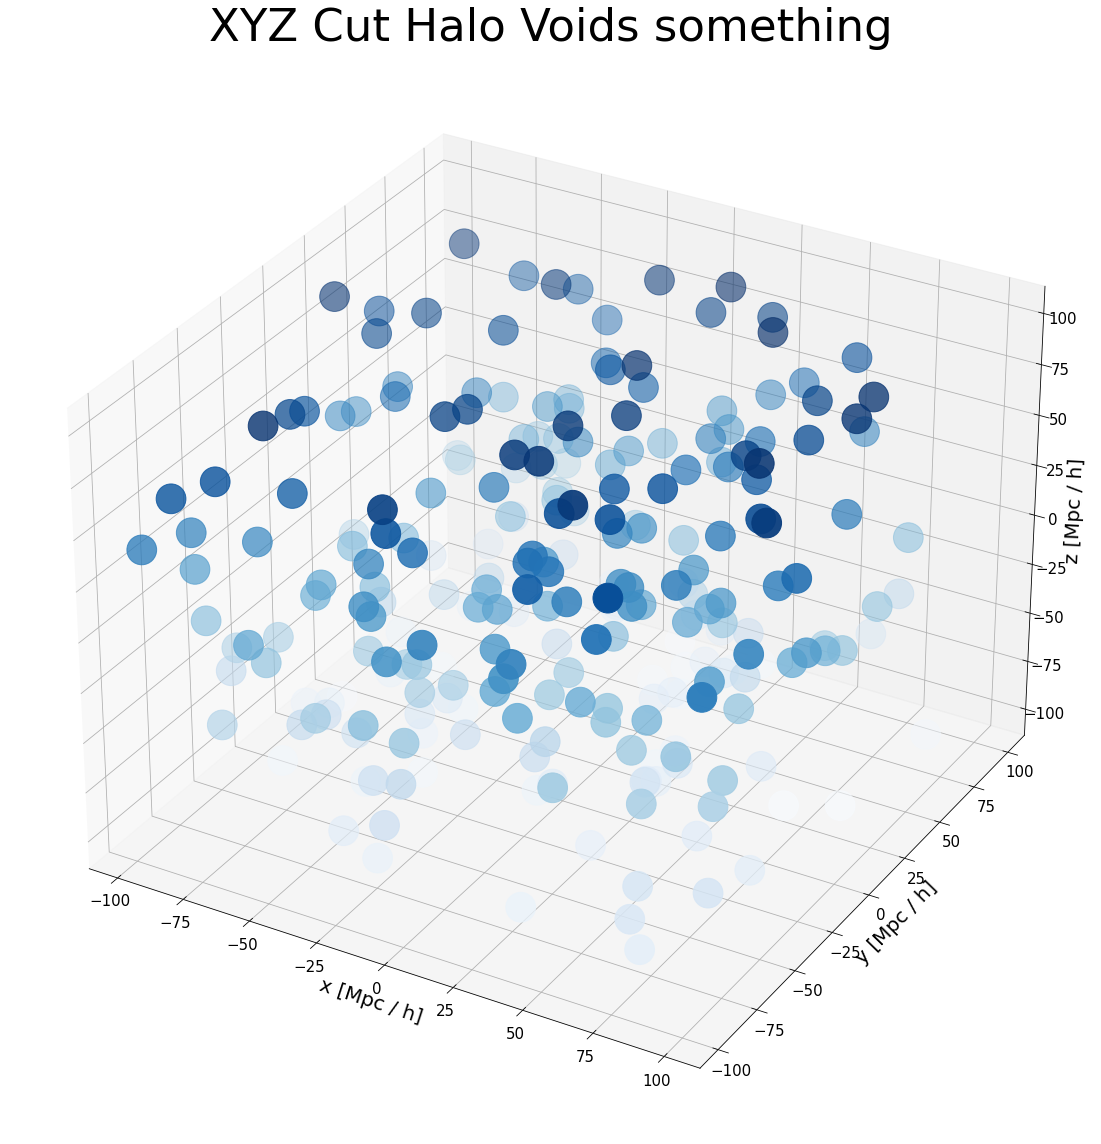

In [1]:
from SelectObjects import SelectVoidsByXYZ
SelectVoidsByXYZ('1024box_masszobov-Voids_cat.txt', -100, 100, -100, 100, -100, 100, autoCenter=True, boxLength=1024, export_file=True, include_plot=True, generate_randoms=True, seed=0, export_rand_file=True, fileAppendix="random", include_rand_plot=True, pointSize=2, title="XYZ Cut Halo Voids something", graphSize=20, axisLabelSize=20, axisTickSize=15, titleSize=45)


<h1>SELECT HALOS BY MASS</h1>

In [19]:
from SelectObjects import SelectHalosByMass
SelectHalosByMass('Trial_PP_halo_catalog_512Mpc_n1024_1_25_10.npy', 7.56635880e+14, 4.37000000e+15, export_file=True, include_plot=False, generate_randoms=True, seed=0, export_rand_file=True, fileAppendix="MassBin5_1_25_10_512res", include_rand_plot=False, pointSize=0.05, title="Mass Cut Halo 1", graphSize=20, axisLabelSize=20, axisTickSize=15, titleSize=45)

Shape of array: (18, 4)


minimum mass: 762574260000000.0
maximum mass: 1688494000000000.0


Mass Selected Halo Catalogue Saved as Trial_PP_halo_catalog_512Mpc_n1024_1_25_10_massmin_756635880000000.0_massmax_4370000000000000.0.npy
Shape of random array: (18, 3)
Random Halo Catalogue Saved as RandomHalos_MassBin5_1_25_10_512res.npy


array([[-1.10560265e+02, -4.99601097e+01, -2.36684322e+00,
         9.11341192e+14],
       [-7.40931244e+01, -2.75010586e+01,  3.36773911e+01,
         9.33706093e+14],
       [ 1.57554428e+02, -9.15864563e+01, -1.69600571e+02,
         1.56095352e+15],
       [ 2.97620564e+01,  5.32625847e+01, -3.87621498e+01,
         8.16883587e+14],
       [ 3.96440125e+01,  6.87427979e+01, -7.82453613e+01,
         1.68849405e+15],
       [-9.24514236e+01, -1.25175598e+02, -9.28050308e+01,
         7.62574262e+14],
       [-1.69173538e+02, -1.35280426e+02, -6.71666031e+01,
         8.04623468e+14],
       [ 2.63744469e+01, -8.20301437e+01,  1.05404938e+02,
         1.02510964e+15],
       [-1.67113190e+01, -8.30853958e+01,  1.08372009e+02,
         9.75610076e+14],
       [-1.57142296e+01,  1.42062057e+02,  1.36089172e+02,
         7.67570181e+14],
       [-6.64117050e+01,  1.06417427e+02,  1.12373840e+02,
         9.01505314e+14],
       [-5.27371254e+01,  4.02870522e+01, -1.58370697e+02,
      

<h1>SELECT VOIDS BY MASS</h1>

Shape of array: (524, 9)


minimum mass: 1.6960145719111974e+46
maximum mass: 3.238168011543806e+47


Mass Selected Void Catalogue Saved as Trial_PP_void_catalog_512Mpc_n1024_1_25_10_massmin_1.67952207e+46_massmax_4.290510561801074e+47.npy
Shape of random array: (524, 3)
Random Void Catalogue Saved as RandomVoids_MassBin2_1_25_10_512res.npy
Shape of array: (524, 9)


x minimum: -519.9624570000001
x maximum: -175.42317900000003
y minimum: -522.150662
y maximum: -174.11119600000004
z minimum: -521.539655
z maximum: -174.68959300000003


x box size: 344.5392780000001
y box size: 348.03946599999995
z box size: 346.850062


minimum radius: 14.288
maximum radius: 50.313
mean radius: 24.345177480916032
maximum/minimum radius: 3.521346584546473


minimum delta_avg: -0.475299
maximum delta_avg: 1.550489
maximum/minimum delta_avg: -3.262133940950854


The mean density is: 8.685451636698969e-27 kg / m3
minimum density: 4.5572651592275855e-27 kg / m3
maximum density: 2.2152148859432717e-26 kg / m3

<Figure size 432x288 with 0 Axes>

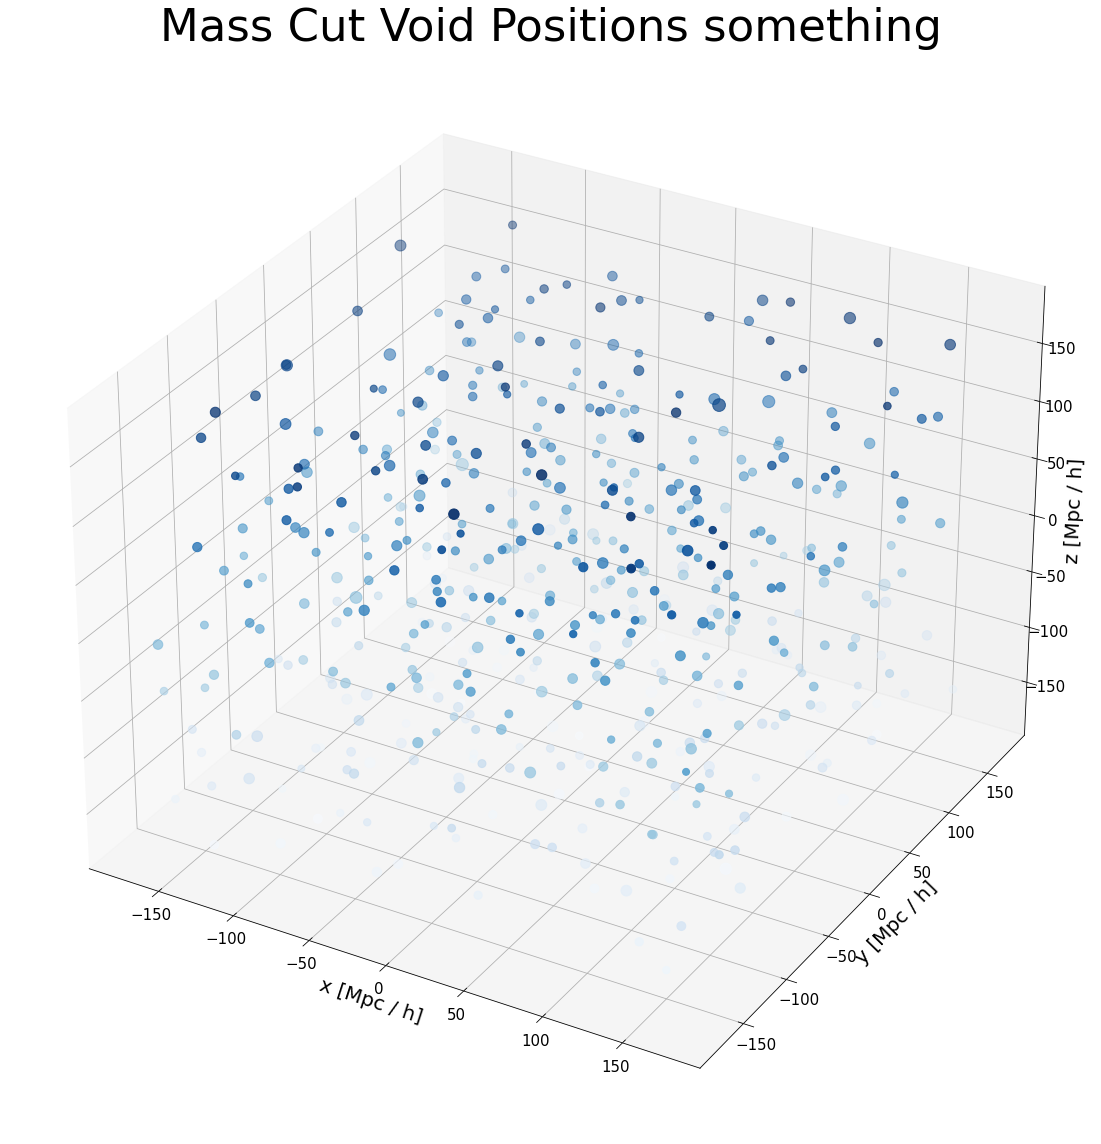

<Figure size 432x288 with 0 Axes>

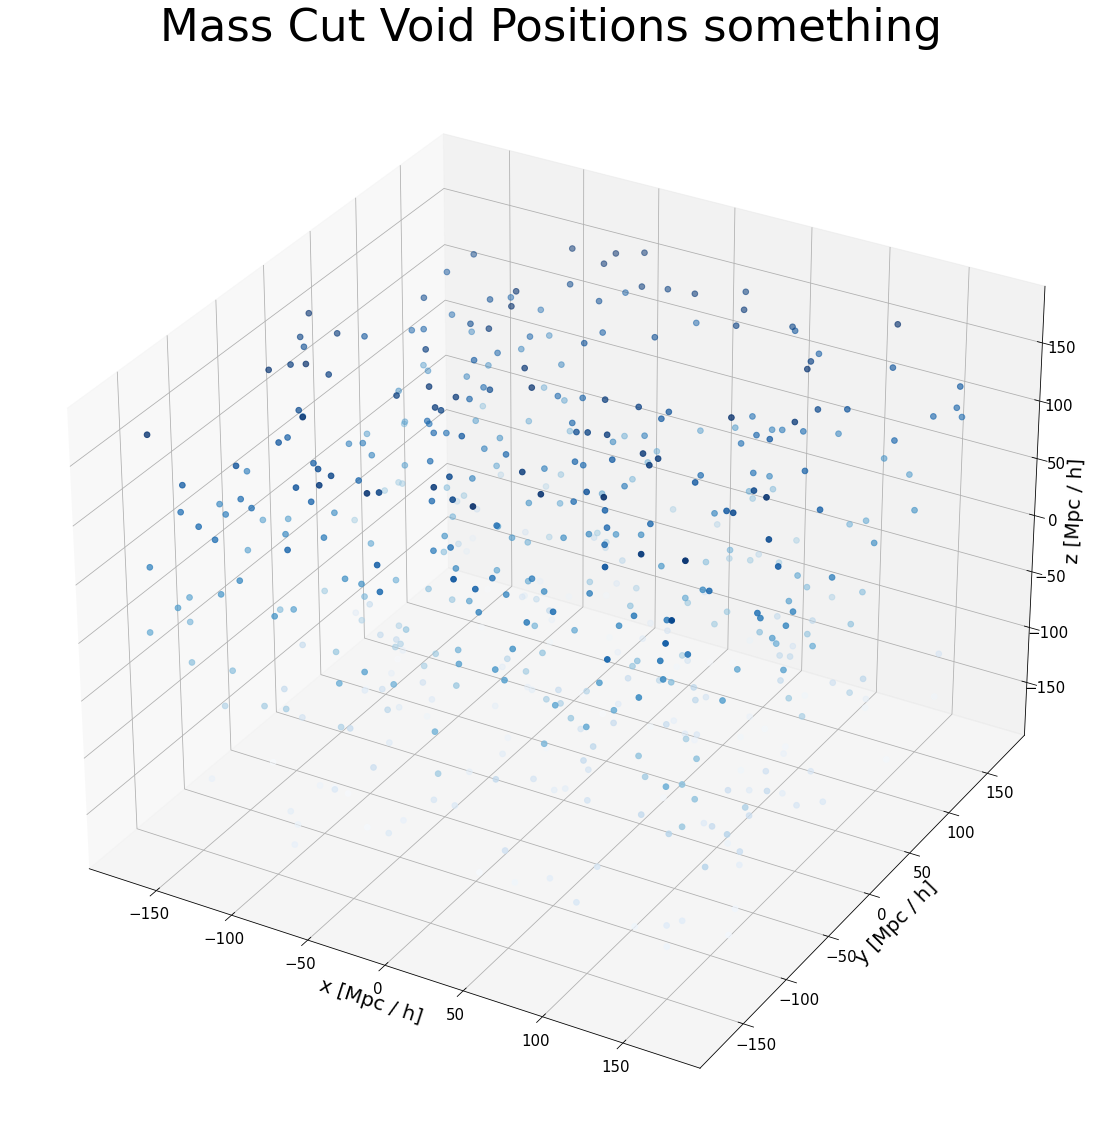

In [27]:
from SelectObjects import SelectVoidsByMass
from LoadCat import LoadVoidCat
from ObjectInfo import VoidInfo
VoidInfo(SelectVoidsByMass('Trial_PP_void_catalog_512Mpc_n1024_1_25_10.txt', 1.67952207e+46, 4.290510561801074e+47, autoCenter=True, boxLength=512, export_file=True, include_plot=True, generate_randoms=True, seed=0, export_rand_file=True, fileAppendix="MassBin2_1_25_10_512res", include_rand_plot=True, pointSize=2, title="Mass Cut Void Positions something", graphSize=20, axisLabelSize=20, axisTickSize=15, titleSize=45))

In [1]:
from LoadCat import LoadHaloCatNbodykit
HaloCatTest = LoadHaloCatNbodykit('Trial_PP_halo_catalog_1024Mpc_n2048_masses.npy')

The Halo Catalog is: ArrayCatalog(size=1921192)


In [1]:
from LoadCat import LoadVoidCatNbodykit
VoidCatTest = LoadVoidCatNbodykit('1024box_masszobov-Voids_cat.txt')

The Void Catalog is: ArrayCatalog(size=11099)


In [2]:
print(VoidCatTest)

ArrayCatalog(size=11099)


In [1]:
from LoadCat import LoadHaloCat
halos,x_min,x_max,y_min,y_max,z_min,z_max,mass_min,mass_max = LoadHaloCat('Trial_PP_halo_catalog_1024Mpc_n2048_masses.npy')

In [4]:
print(type(x_min))

<class 'numpy.float32'>


In [3]:
print(type(4))

<class 'int'>
